In [52]:
#importing essential modules and the dataset
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns   

songstats = pd.read_csv("Umm.csv")

del songstats["Unnamed: 0"]
songstats.head()

,album,track_number,id,name,uri,release_date,key,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,أم كلثوم 35 أغانى وأدوار قديمة 13,1,3cbxGQxZJytXNR7wNiM5NN,أكون سعيد,spotify:track:3cbxGQxZJytXNR7wNiM5NN,2008,6,374253,0.993,0.421,0.0919,0.016,0.230,-15.139,0.0433,106.808,0.289,10
1,أم كلثوم 35 أغانى وأدوار قديمة 13,2,6LYc6G3vrztV5YlDHjtWTk,ليه عزيز دمعى,spotify:track:6LYc6G3vrztV5YlDHjtWTk,2008,2,361507,0.995,0.373,0.0666,0.751,0.304,-18.202,0.0534,66.791,0.286,9
2,أم كلثوم 35 أغانى وأدوار قديمة 13,3,58kKXV7vmEdAHaSM74Kjns,هوده يخلص من الله,spotify:track:58kKXV7vmEdAHaSM74Kjns,2008,5,541027,0.996,0.400,0.0922,0.885,0.669,-20.688,0.0530,112.787,0.216,7
3,أم كلثوم 35 أغانى وأدوار قديمة 13,4,7rKhQ0tmutER7pXdCLtarZ,أمانا إيها القمر المطل,spotify:track:7rKhQ0tmutER7pXdCLtarZ,2008,10,432493,0.992,0.407,0.1690,0.733,0.116,-20.146,0.0722,64.818,0.271,7
4,أم كلثوم 35 أغانى وأدوار قديمة 13,5,04rutXhPS0U587nC05qSGH,الصب تفضحة عيونه,spotify:track:04rutXhPS0U587nC05qSGH,2008,1,379640,0.995,0.392,0.0241,0.864,0.335,-24.438,0.0728,78.813,0.330,7


In [6]:
#checking for abnormally loud tracks
by_loud = list(songstats["loudness"])
by_loud.sort(reverse = True)
positives  = [LOUD for LOUD in by_loud if LOUD >= 0]
#len(positives)
positives

[]

In [7]:
by_energy = list(songstats["energy"])
max(by_energy) 

0.733

In [8]:
#dropping non numerical variables
songstats_analyzable = songstats.drop(["id", "name", "album", "uri", "track_number"], axis = 1)
songstats_analyzable

,release_date,key,duration_ms,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,popularity
0,2008,6,374253,0.993,0.421,0.0919,0.01600,0.230,-15.139,0.0433,106.808,0.289,10
1,2008,2,361507,0.995,0.373,0.0666,0.75100,0.304,-18.202,0.0534,66.791,0.286,9
2,2008,5,541027,0.996,0.400,0.0922,0.88500,0.669,-20.688,0.0530,112.787,0.216,7
3,2008,10,432493,0.992,0.407,0.1690,0.73300,0.116,-20.146,0.0722,64.818,0.271,7
4,2008,1,379640,0.995,0.392,0.0241,0.86400,0.335,-24.438,0.0728,78.813,0.330,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
349,1926,6,322267,0.987,0.433,0.0913,0.70800,0.247,-19.441,0.0561,148.613,0.362,0
350,1926,7,321253,0.993,0.443,0.0655,0.61600,0.092,-21.132,0.0563,122.379,0.338,1
351,1926,8,320253,0.985,0.447,0.1810,0.00615,0.217,-15.525,0.0583,131.129,0.366,0
352,1926,1,317947,0.992,0.357,0.1370,0.00169,0.418,-19.129,0.0538,103.881,0.137,0


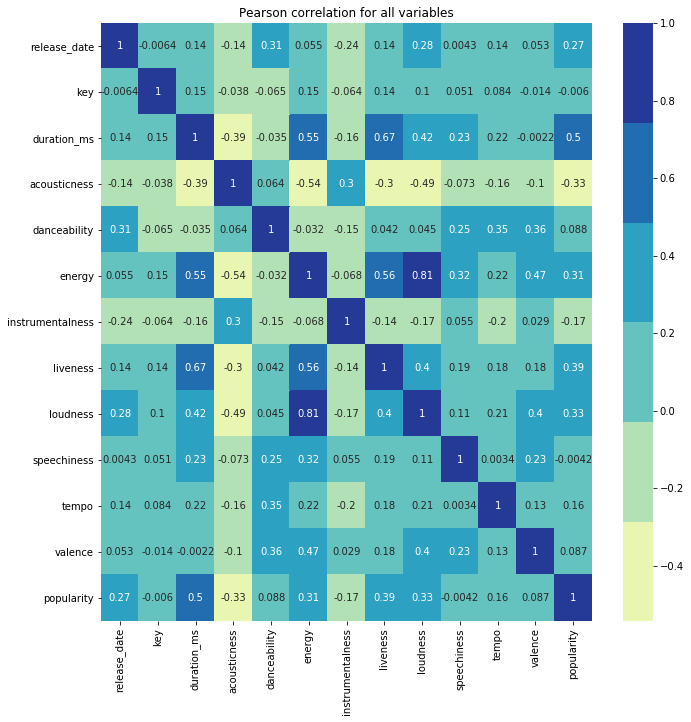

In [9]:
#plotting the first correlation matrix
corrMatrix = songstats_analyzable.corr(method = "pearson")

x = sns.color_palette("YlGnBu")

fig, ax = plt.subplots(figsize=(11,11))
#when the second x in lamda is x**2, the matrix becomes represent r-squared
rsqMatrix = corrMatrix.applymap(lambda x: x)


sns.heatmap(rsqMatrix, annot=True, cmap = x)
plt.title("Pearson correlation for all variables")
plt.show()

In [53]:
#summary stats
songstats_focus.describe()

,duration_ms,energy,liveness,popularity
count,3.540000e+02,354.000000,354.000000,354.000000
mean,8.784498e+05,0.240159,0.427769,3.966102
std,8.901717e+05,0.161511,0.306696,7.416694
min,1.017330e+05,0.008250,0.051900,0.000000
25%,3.551440e+05,0.108000,0.167250,0.000000
50%,4.082400e+05,0.194500,0.316000,0.000000
75%,1.107422e+06,0.366250,0.690750,4.000000
max,3.577800e+06,0.733000,0.986000,44.000000


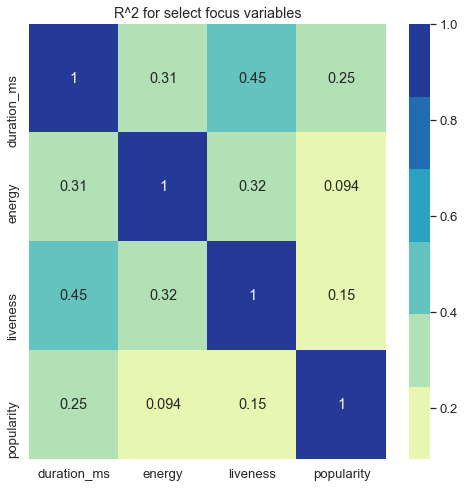

In [61]:
#forming a select focus groups with only 4 variables by dropping indepenedet variables with the lowest r and r^2 values.
songstats_focus = songstats_analyzable.drop(["release_date", "key", "speechiness", "tempo", "valence", "acousticness", "danceability", "instrumentalness", "loudness"], axis = 1)
songstats_focus

corrMatrix = songstats_focus.corr(method = "pearson")

rsqMatrix = corrMatrix.applymap(lambda x: x**2)


x = sns.color_palette("YlGnBu")
fig, ax = plt.subplots(figsize=(8,8)) 
sns.heatmap(rsqMatrix, annot=True, cmap = x)
plt.title("R^2 for select focus variables")
plt.show()

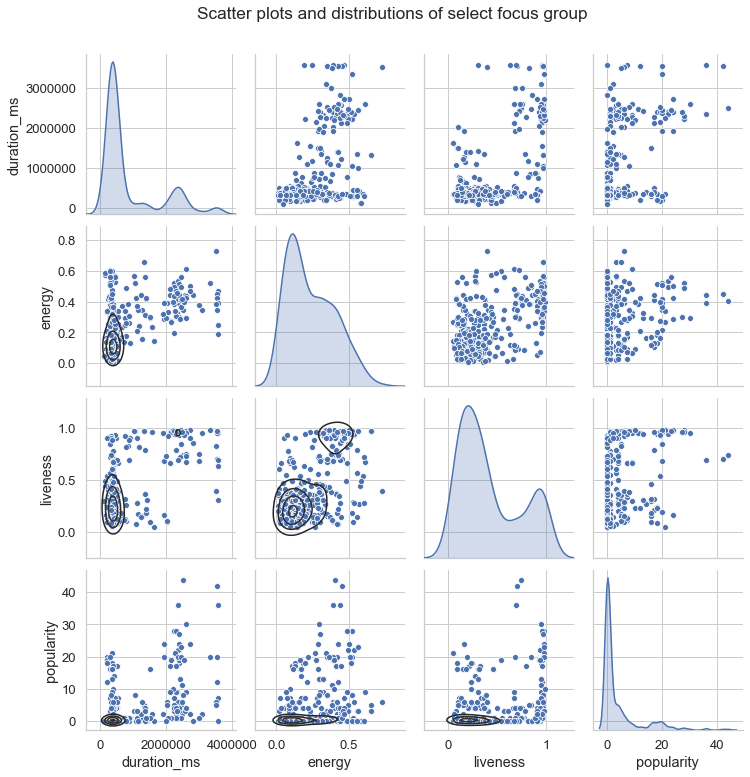

In [55]:
#plotting a pairplot
g = sns.pairplot(songstats_focus, diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
g.fig.suptitle("Scatter plots and distributions of select focus group", y = 1.06)

plt.savefig('the5.png')

In [56]:
#this code was adapted from class to compute the regression model
pd.set_option('max_rows', 10)
import numpy as np
from scipy import stats
import statsmodels.api as statsmodels 
#useful stats package with regression functions

#setting the color and style of table
sns.set(color_codes=True, font_scale = 1.2)
sns.set_style("whitegrid")

def mult_regression(column_x, column_y):
    ''' this function uses built in library functions to construct a linear 
    regression model with potentially multiple predictor variables. It outputs 
    two plots to assess the validity of the model.'''

    # If there is only one predictor variable, plot the regression line
    if len(column_x)==1:
        plt.figure()
        sns.regplot(x=column_x[0], y=column_y, data=data, marker="+",fit_reg=True,color='darkcyan')
    
    # define predictors X and response Y:
    X = data[column_x]
    X = statsmodels.add_constant(X)
    Y = data[column_y]
    
    # construct model:
    global regressionmodel 
    regressionmodel = statsmodels.OLS(Y,X).fit() # OLS = "ordinary least squares"

    # residual plot:
    plt.figure()
    residualplot = sns.residplot(x=regressionmodel.predict(), y=regressionmodel.resid, color='crimson')
    residualplot.set(xlabel='Fitted values for '+column_y, ylabel='Residuals')
    residualplot.set_title('Residuals vs Fitted values',fontweight='bold',fontsize=14)
    
    # QQ plot:
    qqplot = statsmodels.qqplot(regressionmodel.resid,fit=True,line='45', color = "navy")
    qqplot.suptitle("Normal Probability (\"QQ\") Plot for Residuals",fontweight='bold',fontsize=14)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            duration_ms   R-squared:                       0.448
Model:                            OLS   Adj. R-squared:                  0.447
Method:                 Least Squares   F-statistic:                     286.2
Date:                Tue, 02 Feb 2021   Prob (F-statistic):           2.10e-47
Time:                        19:28:03   Log-Likelihood:                -5246.0
No. Observations:                 354   AIC:                         1.050e+04
Df Residuals:                     352   BIC:                         1.050e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4.702e+04   6.04e+04      0.778      0.437   -7.19e+04    1.66e+05
liveness    1.944e+06   1.15e+05     16.917      0.000    1.72e+06    2.17e+06
==============================================================================
Omnibus:                       63.920   Durbin-Watson:                   1.200
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              139.708
Skew:                           0.924   Prob(JB):                     4.60e-31
Kurtosis:                       5.461   Cond. No.                         3.91
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

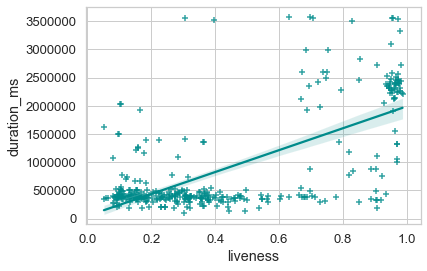

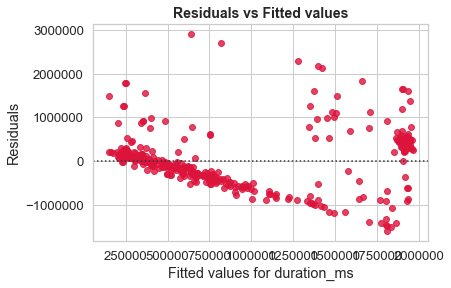

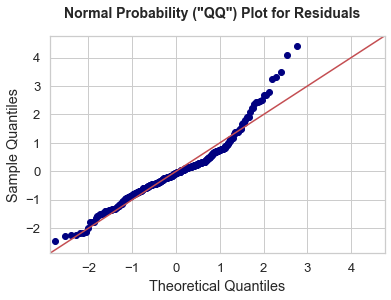

In [57]:
#regression summary for liveness and duration_ms
data = songstats_focus
mult_regression(['liveness'],'duration_ms')
regressionmodel.summary()

In [30]:
#a funnction I built that calculates the correlation coefficient, built on the custom_stats module I built for a CS50 assignment (Badra, 2020). 
import custom_stats as stats
import numpy as np

def correlator(x, y):

    STDx = stats.STDer(x)
    STDy = stats.STDer(y)
    mean_x = stats.meaner(x)
    mean_y = stats.meaner(y)
    count = len(x)

    running_zs_product = 0
    for point in range(count):
        Zx = (x[0] - mean_x) / STDx
        Zy = (y[1] - mean_y) / STDy
        running_zs_product += (Zx * Zy)
        #print(running_zs_product)

    return running_zs_product / (count)

In [34]:
stats.STDer(list(songstats_focus["duration_ms"]))

888913.4627127765

In [45]:
#calculating the correlation coefficient
import statistics as s
from scipy import stats
x = list(songstats_focus["liveness"])
y = list(songstats_focus["duration_ms"])

y_std = s.stdev(y)
x_std = s.stdev(x)

r = stats.pearsonr(x, y)[0]

print("The slope equals", round((y_std/x_std)*r, 2))

The slope equals 1943636.59


In [59]:
#investigating the max of the variables to help with model interpretation
print(max(songstats_focus["liveness"]))
print(max(songstats_focus["duration_ms"]))

0.986
3577800
